<h1><strong><u>Breast Cancer Classifier Model</u></strong></h1>

In [1]:
%%capture
%run KNNBreastCancerClassifier.ipynb
%run LogisticBreastCancerClassifier.ipynb
%run NaiveBayesBreastCancerClassifier.ipynb

In [2]:
knn_classifier = knn_bc_classifier()
log_classifier = log_bc_classifier()
nb_classifier = nb_bc_classifier()
print(knn_classifier)
print(nb_classifier)
print(log_classifier)

Pipeline(steps=[('clf', KNeighborsClassifier(n_neighbors=10))])
GaussianNB()
Pipeline(steps=[('scale', StandardScaler()),
                ('clf', LogisticRegression(C=0.5))])


<h2><strong><u>Final Model Selection</u></strong></h2>

<h3><strong><u>Cross-Validation Test</u></strong></h3>

In [3]:
pipeline = Pipeline(
    [
        ("clf", None)
    ]
)
param_grid = {"clf": [knn_classifier, log_classifier, nb_classifier]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters:  {'clf': Pipeline(steps=[('scale', StandardScaler()),
                ('clf', LogisticRegression(C=0.5))])}


<h2><strong><u>Model Testing</u></strong></h2>

<h3><strong><u>Performance Metrics</u></strong></h3>

In [4]:
for key, value in clf_metrics.items():
    print(f"{key}")
    log_test_values = cross_val_score(best_model, X_test, y_test, scoring=value, cv=5)
    print(f"CV test Scores: ", log_test_values)
    np_log_test_values = np.array(log_test_values)
    average = np.mean(np_log_test_values)
    stDev = np.std(np_log_test_values)
    print(f"Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV test Scores:  [0.95652174 0.95652174 1.         0.95652174 0.90909091]
Average and Standard Error:  0.96% ± 2.88% 

Precision
CV test Scores:  [1.         0.92857143 1.         1.         0.86666667]
Average and Standard Error:  0.96% ± 5.38% 

Recall
CV test Scores:  [0.92307692 1.         1.         0.92857143 1.        ]
Average and Standard Error:  0.97% ± 3.64% 

Negative Predictive Value
CV test Scores:  [0.90909091 1.         1.         0.9        1.        ]
Average and Standard Error:  0.96% ± 4.69% 

Specificity
CV test Scores:  [1.         0.9        1.         1.         0.77777778]
Average and Standard Error:  0.94% ± 8.79% 



Text(0.5, 1.0, 'Final Breast Cancer Classifier: Confusion Matrix (Test)')

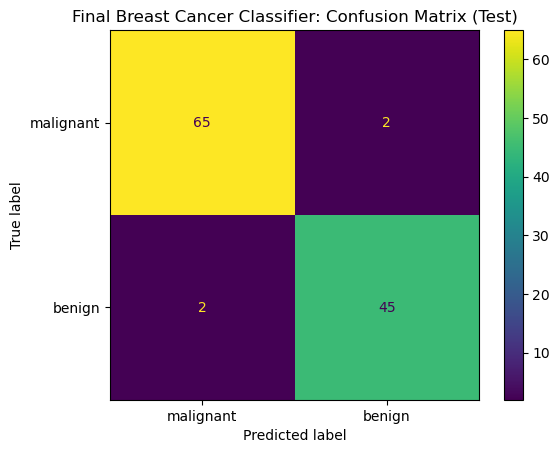

In [5]:
#Testing Confusion Matrix
test_predictions = best_model.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, test_predictions, labels=['malignant', 'benign'])
disp.ax_.set_title("Final Breast Cancer Classifier: Confusion Matrix (Test)")

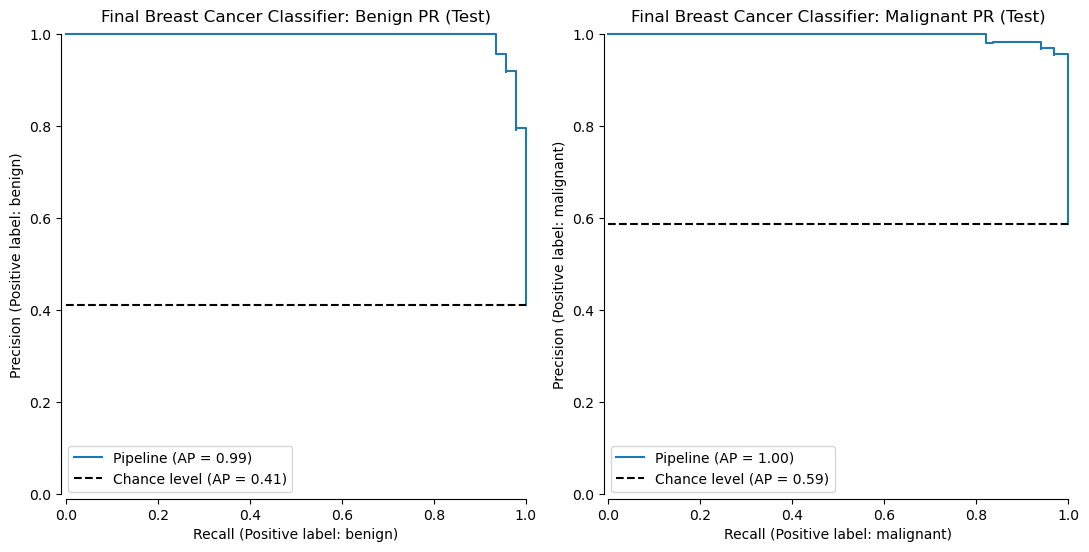

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(11, 11))
axs = axs.flatten()
count = 0
for label in test_labels:
    disp = PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, ax=axs[count], pos_label=label, plot_chance_level=True, despine=True)
    disp.ax_.set_title(f"Final Breast Cancer Classifier: {label.capitalize()} PR (Test)")
    count += 1

plt.tight_layout()  
plt.show()

<h4><strong><u>Findings From 'Model Testing' Phase</u></strong></h4>
In the testing phase of my selected model, I found that the testing results werein keeping with my results from the 'Model Evaluation' section. 

<h2><strong><u>Conclusion</u></strong></h2>
I will note that I would like to get my evaluation and test scores as close to 100% as possible. Considering the magnitude of the purpose of this model, we need to minimize False Positives and False Negative as much as possible because patients lives are at risks depending on these results. I will be looking into other models to compare them so that I can reach this goal.

<h1><strong><u>Breast Cancer Final Thoughts</u></strong></h1>

After applying the K-Nearest Neighbors, Naive Bayes, and Logistic Regression models, I found that the Logistic Regression model far exceeded the other models that I tested. Therefore, I chose the Logistic Regression as my model of choice for this Breast Cancer Classification problem.